***
***
# Proyecto 4: Clustering
***
***
## Integrantes:

- Diryon Yonith Mora Romero
- Laura Valentina Gonzalez Rodriguez
***
***
## Carga de Liberias Necesarias

In [125]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

***
***
## Manejo de los Datos
El primer paso consiste en cargar los datos con el fin de llevar a cabo el proceso de limpieza correspondiente, el cual incluye la eliminación de los registros que presenten valores nulos. Una vez completada esta etapa, se procede a seleccionar únicamente las columnas `Reporting Area`, `Crime` y `Neighborhood` para su posterior análisis. Dado que las últimas dos columnas son de naturaleza categórica, se realiza la conversión a variables dummy con el objetivo de facilitar el análisis posterior, como por ejemplo la aplicación del Análisis de Componentes Principales (PCA).

Finalmente, en lugar de trabajar con la totalidad de la población de datos, se opta por una muestra aleatoria de 5000 observaciones. Este enfoque de muestreo permite obtener una representación adecuada de la población general, reduciendo la complejidad computacional y el tiempo de procesamiento necesario para llevar a cabo los análisis posteriores.

In [126]:
df = pd.read_csv('CrimenCambridge.csv')
df = df.dropna()
df = df[["Crime", "Reporting Area", "Neighborhood"]]
df = df.sample(n=5000, random_state=1)
df_no_dummies = df


df = pd.get_dummies(df, columns=["Crime", "Neighborhood"])

***
***
# Aplicar PCA
Para llevar a cabo el análisis de componentes principales (PCA), se procede a crear una instancia del objeto PCA, donde se especifica la selección de las dos componentes principales con la mayor varianza explicativa. Al ajustar el modelo de PCA a nuestros datos, se obtienen los loadings de estas dos componentes, los cuales nos brindan información sobre la relación de las variables originales con las componentes principales.

Con base en estos loadings, se crea un nuevo dataframe que contiene únicamente las variables originales asociadas a las dos componentes principales seleccionadas. Este nuevo dataframe nos permite trabajar con un conjunto de variables más reducido y representativo de la estructura de varianza de los datos originales. Al conservar las componentes principales con mayor varianza explicativa, nos aseguramos de retener la información más relevante de los datos originales en un espacio de menor dimensión.


In [127]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

***
***
## Visualizar el PCA
Una vez obtenidos los loadings de las componentes principales seleccionadas, se procede a realizar un scatter plot para visualizar la relación entre ellas. En este gráfico, podemos observar de manera intuitiva la existencia de **13 grupos distintos** de observaciones, los cuales podrían compartir características similares.

Al reconocer la presencia de estos 13 grupos distintos en el scatter plot, se nos brinda una indicación preliminar sobre las posibles categorías o clasificaciones que podrían existir en nuestras observaciones. Esta información inicial puede servir como punto de partida para investigaciones más detalladas y análisis posteriores sobre las características y comportamientos de cada uno de estos grupos identificados.

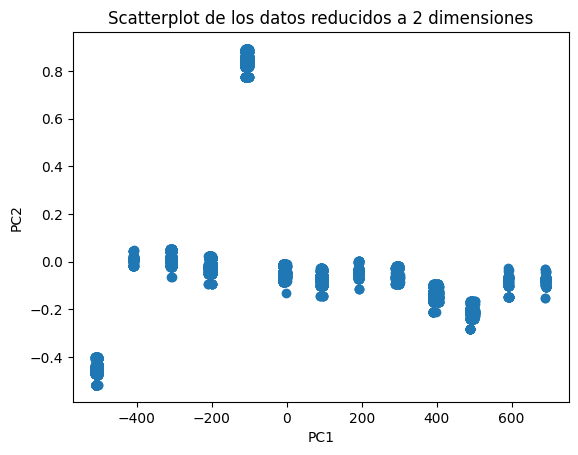

In [128]:
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot de los datos reducidos a 2 dimensiones')
plt.show()

***
***
## Algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Al ajustar el valor de epsilon, se produce un efecto en la distancia máxima permitida entre dos muestras para considerarlas vecinas, lo que a su vez influye en la densidad requerida para formar un grupo. En este contexto, la densidad se refiere a la concentración de observaciones en una determinada región.

Cuando disminuimos el valor de epsilon, se reduce la distancia máxima permitida entre muestras para considerarlas vecinas. Esto implica que se requiere una mayor densidad de observaciones en una región determinada para formar un grupo. En otras palabras, los puntos deben estar más cerca entre sí para ser considerados parte del mismo grupo.

En el caso específico que estamos analizando, si elegimos un epsilon menor o igual a uno, observamos que los datos se fragmentan en mayor medida, lo que resulta en un aumento en la cantidad de clusters en comparación con lo que habíamos identificado inicialmente en el scatter plot de las principales componentes (que eran fácilmente distinguibles a simple vista).

Si deseamos mantener la suposición inicial de tener 13 grupos, debemos considerar un valor de epsilon mayor a 1. Esto implica permitir una mayor distancia entre observaciones para formar grupos, lo que resulta en una densidad relativamente baja por grupo. Al ajustar epsilon de esta manera, podemos mantener un número mínimo de muestras en cada grupo sin requerir una densidad demasiado alta.

Es importante considerar cuidadosamente el valor de epsilon y su impacto en la formación de grupos, ya que puede influir en la interpretación y el análisis de los datos. Ajustar adecuadamente el valor de epsilon nos permitirá obtener resultados coherentes y significativos en el proceso de agrupamiento.

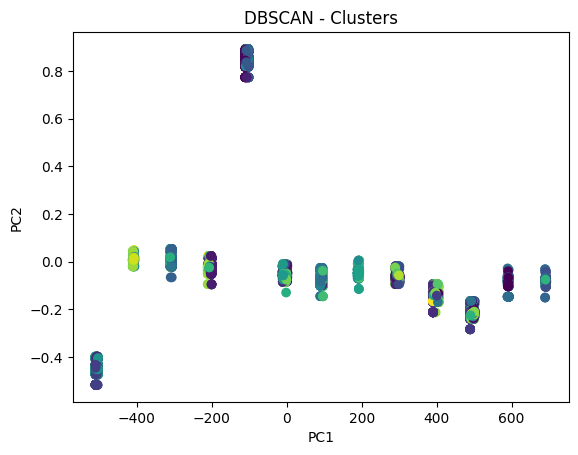

In [129]:
dbscan = DBSCAN(eps=0.1,min_samples = 5)
clusters = dbscan.fit_predict(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN - Clusters')
plt.show()

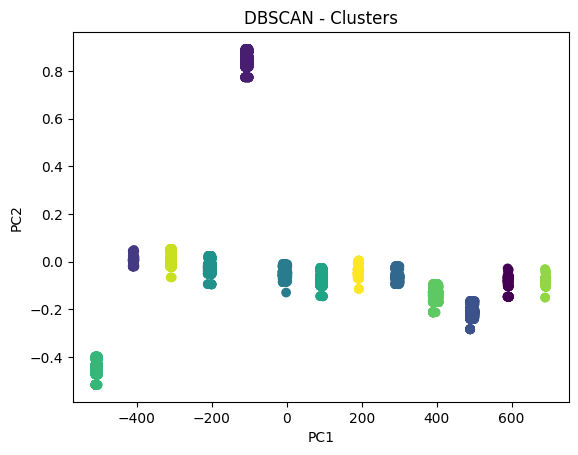

In [130]:
dbscan = DBSCAN(eps=1,min_samples = 5)
clusters = dbscan.fit_predict(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN - Clusters')
plt.show()

***
***
## K-Means
Siguiendo la hipótesis planteada sobre la cantidad de grupos, procedemos a ejecutar el algoritmo K-means con un número de clusters establecido en 13. Podemos observar que los clusters obtenidos coinciden exactamente con los grupos presupuestos previamente identificados.

Este resultado es altamente significativo, ya que respalda y valida la suposición inicial de tener 13 grupos distintos en nuestros datos. La concordancia exacta entre los clusters generados por el algoritmo K-means y los grupos presupuestos fortalece nuestra confianza en la estructura y las características inherentes de los datos.

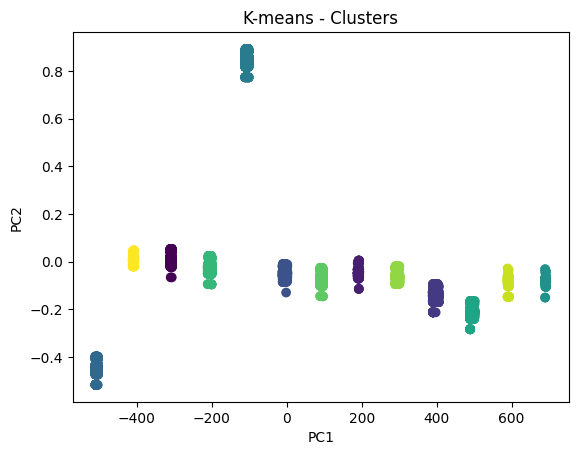

In [131]:
N_CLUSTERS = 13
kmeans = KMeans(n_clusters=N_CLUSTERS, n_init = "auto")
clusters = kmeans.fit_predict(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means - Clusters')
plt.show()


***
***
## Algoritmos Aglomerativos.
El algoritmo `AgglomerativeClustering` realiza un clustering jerárquico utilizando un enfoque ascendente. En este enfoque, cada observación se considera inicialmente como un grupo individual y luego se fusiona con otros grupos de acuerdo con diferentes criterios de enlace. Estos criterios incluyen:

1. `Ward`: Este criterio busca minimizar la diferencia de cuadrados dentro de los grupos fusionados. El objetivo es formar grupos que tengan una varianza mínima dentro de ellos.

2. `Complete Linkage`: En este criterio, se minimiza la distancia entre los pares de grupos. El objetivo es fusionar grupos que tengan las observaciones más cercanas entre sí.

3. `Average Linkage`: Este criterio minimiza el promedio de las distancias entre todas las observaciones de los grupos fusionados. Busca formar grupos que tengan una distancia media mínima entre sus observaciones.

4. `Simple Linkage`: En este criterio, se minimiza la distancia entre las observaciones más cercanas de los pares de grupos fusionados. El objetivo es formar grupos que tengan las observaciones más similares en términos de distancia.

Es importante tener en cuenta que el objeto `AgglomerativeClustering` utiliza por defecto la distancia euclidiana como medida de distancia para los enlaces.

Al visualizar los resultados del clustering jerárquico y ajustar nuevamente el número de clusters a 13, podemos observar que los clusters obtenidos coinciden con los grupos inicialmente supuestos. Esta congruencia entre los grupos identificados y los presupuestos previos respalda la consistencia y la validez de nuestro análisis.


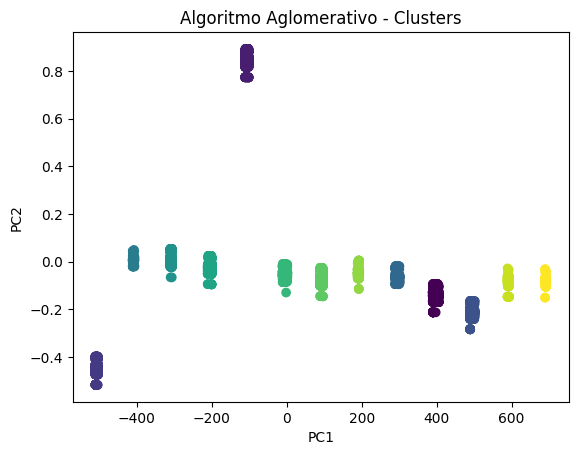

In [132]:
agglomerative = AgglomerativeClustering(n_clusters=N_CLUSTERS)
clusters = agglomerative.fit_predict(principal_df)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Algoritmo Aglomerativo - Clusters')
plt.show()


***
***
## Indices de los registros según el cluster.
En el cluster número 1, se observa que la gran mayoría de las observaciones comparten la característica de pertenecer al vecindario de `West Cambridge`. Además, se destaca que estas observaciones tienen valores muy similares en la columna `Reporting Area`, lo que indica que los incidentes ocurrieron en la misma área o barrio dentro de `West Cambridge`. Sin embargo, a pesar de estas similitudes espaciales, no comparten un tipo de crimen específico en común.

In [133]:
cluster_indices = [np.where(clusters == cluster)[0] for cluster in np.unique(clusters) if cluster != -1]

common_data = df_no_dummies.iloc[cluster_indices[0]]
common_data


,Crime,Reporting Area,Neighborhood
49611,Warrant Arrest,1002.0,West Cambridge
44129,Larceny of Bicycle,1011.0,West Cambridge
34326,Arson,1012.0,West Cambridge
53926,Domestic Dispute,1004.0,West Cambridge
15172,Street Robbery,1002.0,West Cambridge
...,...,...,...
38308,Larceny from Person,1002.0,West Cambridge
21054,Commercial Robbery,1002.0,West Cambridge
42751,Larceny from Residence,1003.0,West Cambridge
41649,Auto Theft,1008.0,West Cambridge


***
***
## Conclusiones
Después de realizar un análisis exhaustivo que involucra técnicas de reducción de dimensionalidad como PCA y la exploración de los clusters generados por los algoritmos `DBSCAN`, `K-means` y `AgglomerativeClustering`, llegamos a la conclusión de que hay 13 grupos distintos de observaciones en los datos analizados. Estos grupos comparten características similares en términos de ubicación geográfica, específicamente en relación a los barrios y áreas de informe.

Sin embargo, no se encontró una relación clara entre el tipo de crimen y los grupos identificados. Esto sugiere que la distribución de los tipos de crímenes no está fuertemente influenciada por la ubicación geográfica. En otras palabras, no se puede establecer una conexión directa entre un tipo de crimen específico y una determinada área o barrio.

Este hallazgo tiene implicaciones importantes, ya que indica que otros factores pueden estar influyendo en la distribución de los tipos de crímenes en lugar de la ubicación geográfica. Estos factores podrían incluir características socioeconómicas, demográficas o culturales, entre otros. Es crucial considerar estos aspectos adicionales al abordar el análisis de crímenes y diseñar estrategias de prevención o intervención.